In [400]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling as pp
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer, StandardScaler, PolynomialFeatures
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, silhouette_score, SCORERS, f1_score
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV, LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# SMOTE
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE, SMOTENC

import warnings
warnings.filterwarnings("ignore")

In [419]:
# Reading and merging the training files
train1=pd.read_csv('train_1.csv')
train2=pd.read_csv('train_2.csv')
train3= pd.read_csv('train_3.csv')
train4=pd.merge(train1,train2,how='outer')
train=pd.merge(train4,train3,how='outer')

#renaming the columns
train.columns=['Ref.No','Amount of the given credit (NT dollar)','Gender','Education',
               'Marital status','Age','repayment status in September','repayment status in August','default',
              'repayment status in july','repayment status in june','repayment status in may','repayment status in april',
              'Amount of bill statement','amount of bill statement in September', 'amount of bill statement in August',
              'amount of bill statement in July','amount of bill statement in May',
              'amount of bill statement in April','amount paid in September',
              'amount paid in August','amount paid in July',
              'amount paid in June','amount paid in May',
              'amount paid in April']
# drop duplicates
train.drop_duplicates(inplace=True)

# dropping irrelevant columns and splitting independent and target variables
x_train=train.drop(['Ref.No','default'],axis=1)
y_train=train.default

#Repeating the process for test dataset
x_test= pd.read_csv('test.csv')[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7',
                                 'X8','X9','X10','X11','X12','X13','X14',
                                 'X15','X16','X17','X18','X19','X20','X21','X22','X23']]

x_test.columns=['Amount of the given credit (NT dollar)','Gender','Education',
               'Marital status','Age','repayment status in September','repayment status in August',
              'repayment status in july','repayment status in june','repayment status in may','repayment status in april',
              'Amount of bill statement','amount of bill statement in September', 'amount of bill statement in August',
              'amount of bill statement in July','amount of bill statement in May',
              'amount of bill statement in April','amount paid in September',
              'amount paid in August','amount paid in July',
              'amount paid in June','amount paid in May',
              'amount paid in April']

# removing correlated columns
x_train.drop(['amount of bill statement in September',
              'amount of bill statement in July',
              'amount of bill statement in May'],axis=1, inplace=True)
x_test.drop(['amount of bill statement in September',
              'amount of bill statement in July',
              'amount of bill statement in May'],axis=1,inplace=True)

In [420]:
citi=x_train[['Amount of the given credit (NT dollar)','Gender','Education',
               'Marital status','Age','repayment status in September','repayment status in August',
              'repayment status in july','repayment status in june','repayment status in may','repayment status in april',
              'Amount of bill statement','amount of bill statement in August',
              'amount of bill statement in April','amount paid in September',
              'amount paid in August','amount paid in July',
              'amount paid in June','amount paid in May',
              'amount paid in April']]

In [421]:
citi['default']=y_train

In [422]:
citi.head()

,Amount of the given credit (NT dollar),Gender,Education,Marital status,Age,repayment status in September,repayment status in August,repayment status in july,repayment status in june,repayment status in may,...,Amount of bill statement,amount of bill statement in August,amount of bill statement in April,amount paid in September,amount paid in August,amount paid in July,amount paid in June,amount paid in May,amount paid in April,default
0,320000,2,1,2,27,1,2,2,2,2,...,43243,41370,38680,2000,1500,2000,1500,1500,0,1
1,470000,1,2,1,41,-2,-2,-2,-2,-2,...,13780,32463,8294,12300,32520,34,68,8334,45684,0
2,20000,1,2,2,25,1,2,0,0,0,...,20415,18921,17717,1264,1249,625,700,1000,1000,0
3,80000,1,3,1,41,0,0,0,0,0,...,76015,60311,2099,3008,3000,5000,10000,2099,0,1
4,30000,1,1,2,30,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1


In [423]:
pp.ProfileReport(citi)

In [438]:
pp.ProfileReport(x_test)

# Analysis
#1. Drop Duplicates


#2. High Multicollenearity among variables- apply pca for those
        #amount_of_bill_statement_in_July is highly correlated with amount_of_bill_statement_in_August 
        #amount_of_bill_statement_in_May is highly correlated with amount_of_bill_statement_in_July
        #amount_of_bill_statement_in_September is highly correlated with amount_of_bill_statement_in_August 
        
    

## Bivariate Analysis

In [426]:
citi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21600 entries, 0 to 21599
Data columns (total 21 columns):
Amount_of_the_given_credit_(NT_dollar)    21600 non-null int64
Gender                                    21600 non-null int64
Education                                 21600 non-null int64
Marital_status                            21600 non-null int64
Age                                       21600 non-null int64
repayment_status_in_September             21600 non-null int64
repayment_status_in_August                21600 non-null int64
repayment_status_in_july                  21600 non-null int64
repayment_status_in_june                  21600 non-null int64
repayment_status_in_may                   21600 non-null int64
repayment_status_in_april                 21600 non-null int64
Amount_of_bill_statement                  21600 non-null int64
amount_of_bill_statement_in_August        21600 non-null int64
amount_of_bill_statement_in_April         21600 non-null int64
amount_pa

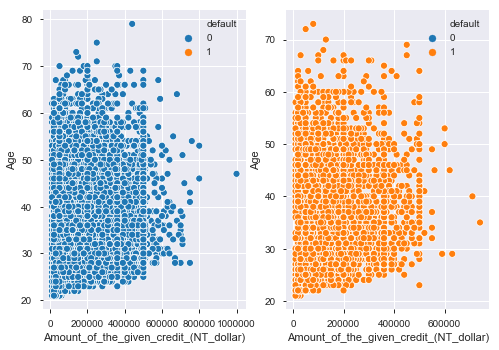

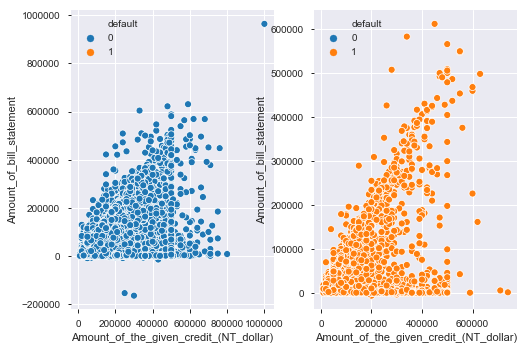

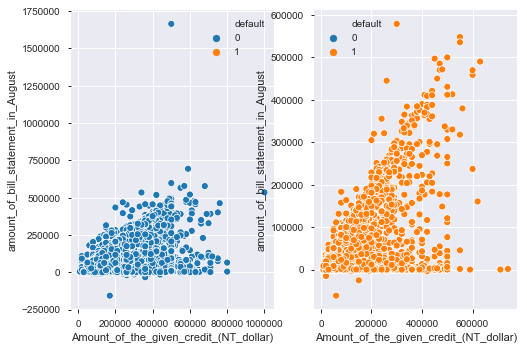

In [447]:
#plt.scatter(citi[citi.default==1]['Amount_of_the_given_credit_(NT_dollar)'],citi[citi.default==1]['Age'],c='r')
#plt.scatter(citi[citi.default==0]['Amount_of_the_given_credit_(NT_dollar)'],citi[citi.default==1]['Age'])
for col in ['Age','Amount_of_bill_statement','amount_of_bill_statement_in_August']:
    plt.subplot(121)
    sns.scatterplot(citi[citi.default==0]['Amount_of_the_given_credit_(NT_dollar)'],citi[col],hue=citi.default)
    plt.subplot(122)
    sns.scatterplot(citi[citi.default==1]['Amount_of_the_given_credit_(NT_dollar)'],citi[col],hue=citi.default)
    plt.show()

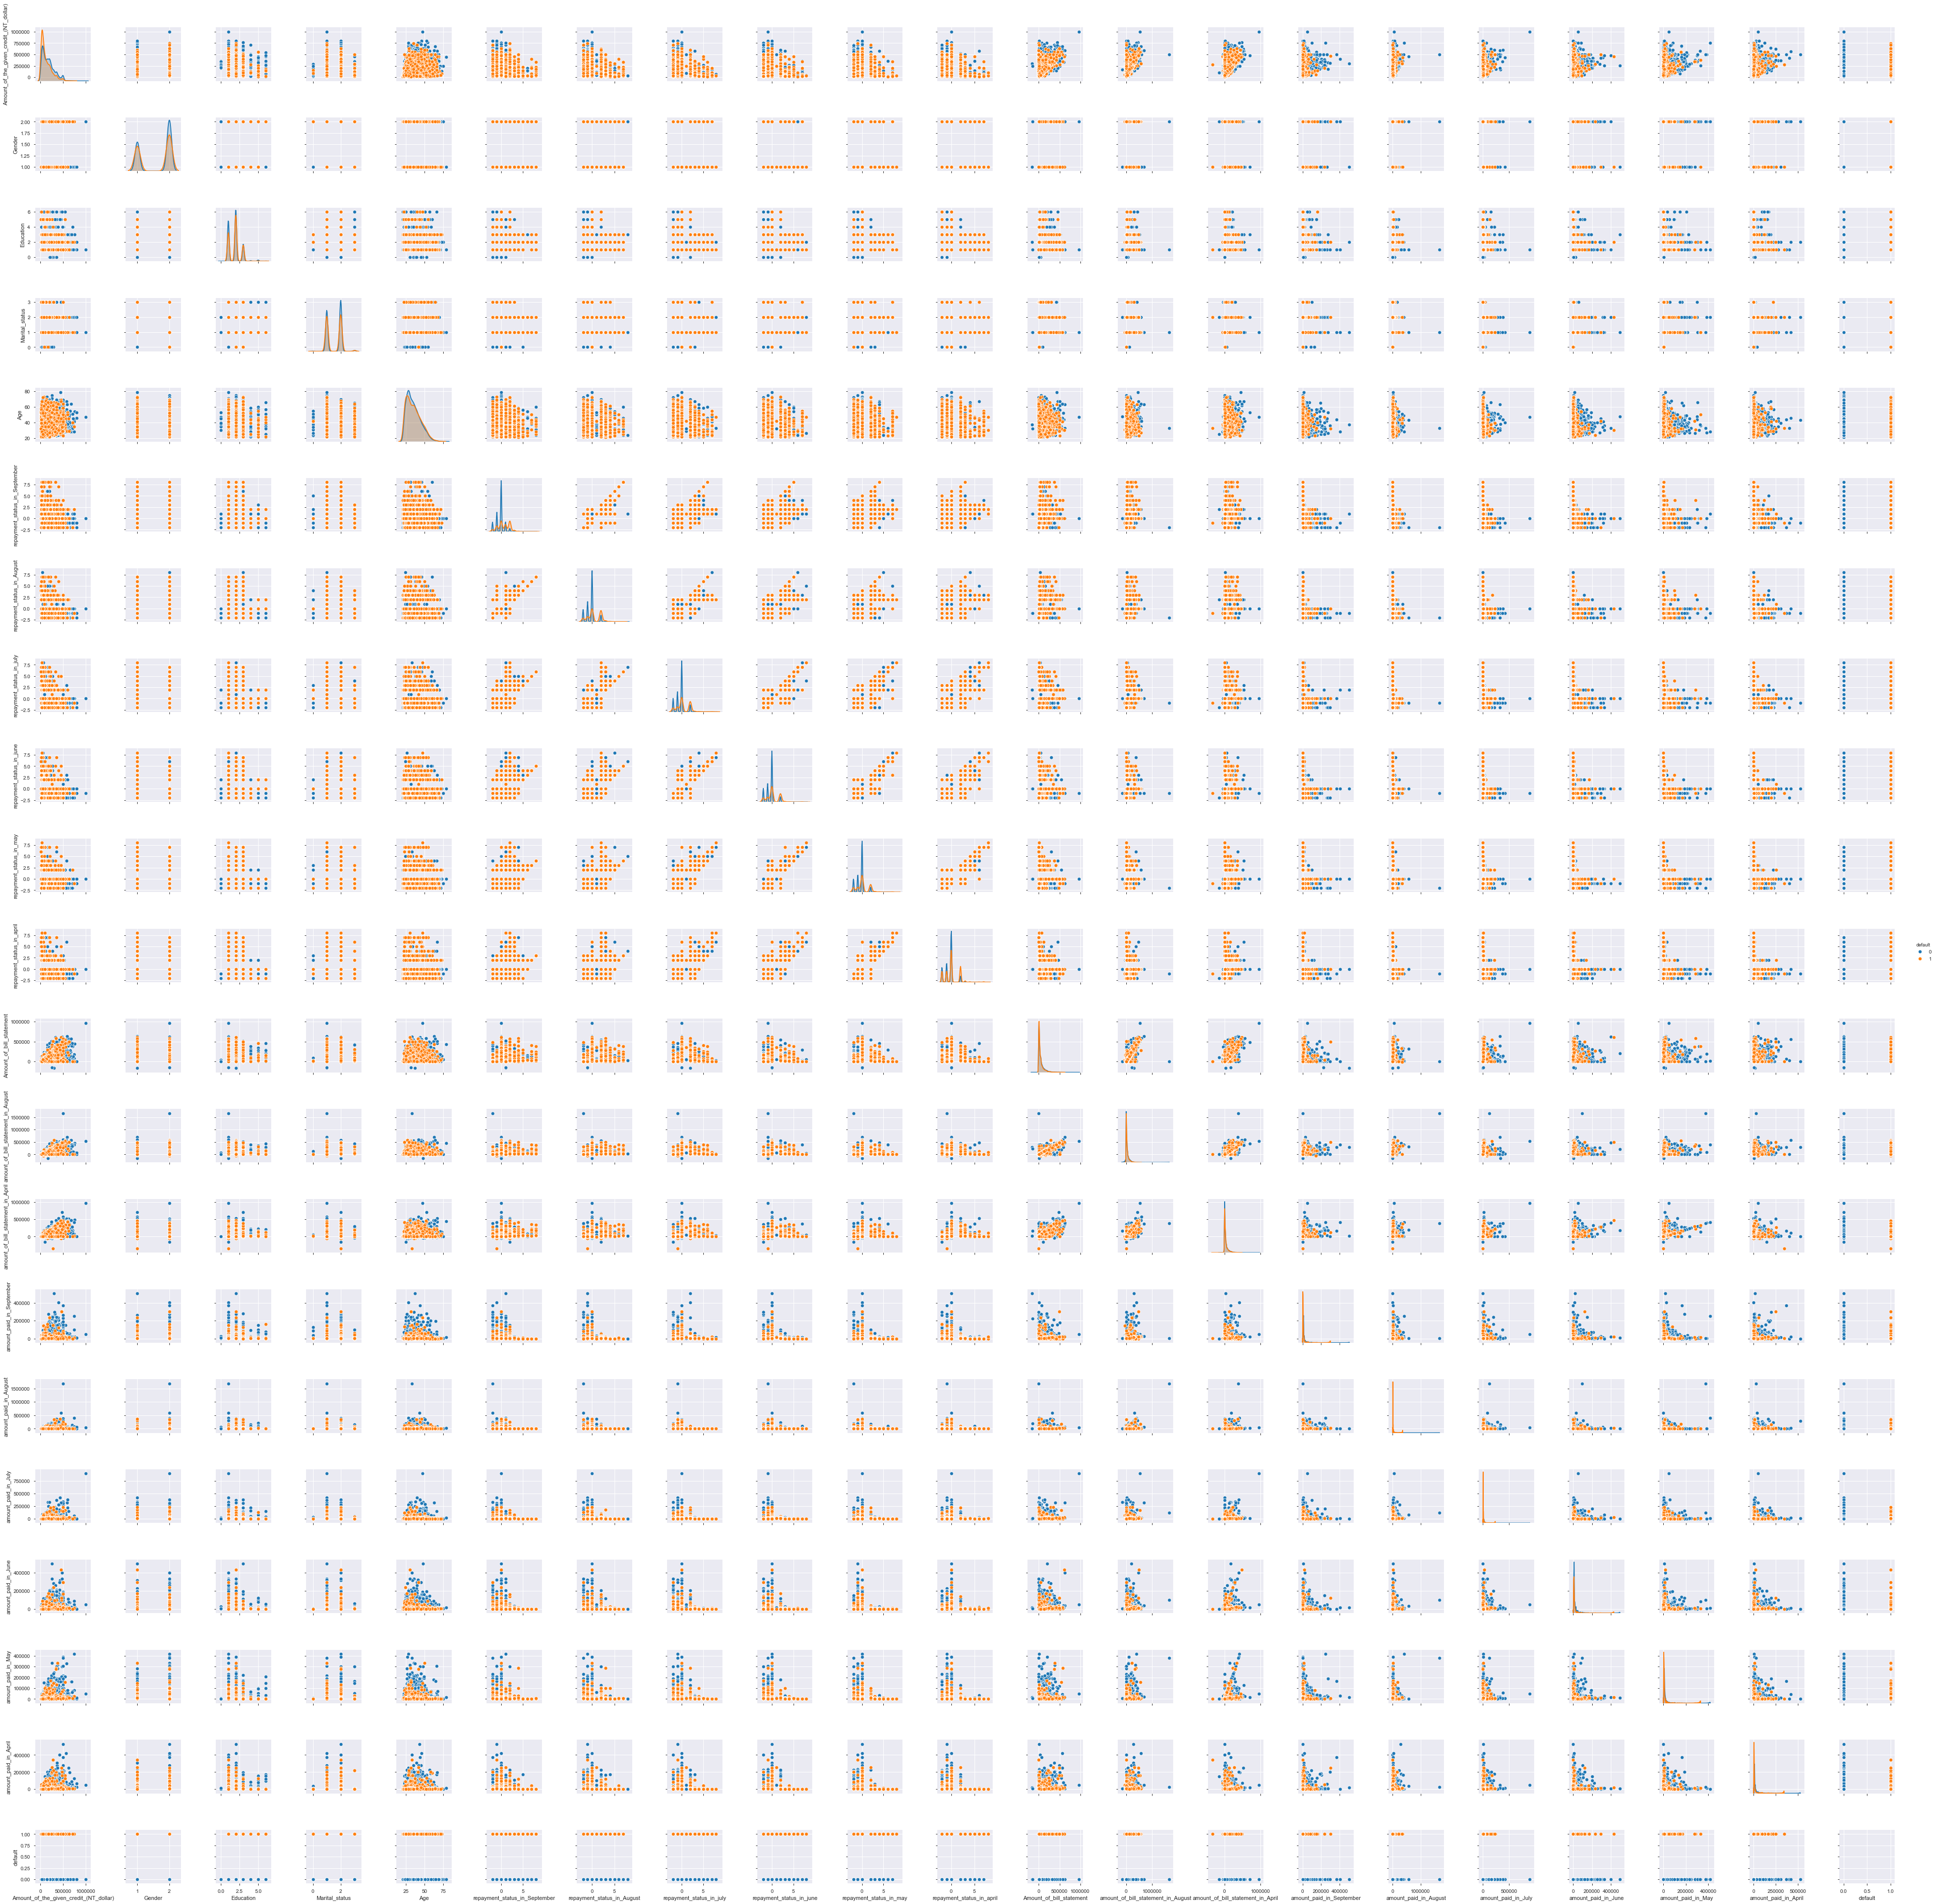

In [437]:
sns.pairplot(citi,hue='default',diag_kind='kde')
plt.show()

# EDA

default
0    16766
1     4834
Name: Amount of the given credit (NT dollar), dtype: int64


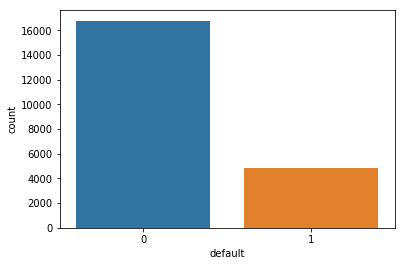

In [62]:
# Target variable
print(citi.groupby('default').count().iloc[:,0])
sns.countplot(citi.default)
plt.show()

# Dataset Imbalanced
# Default class is about 20% of the total data points
# SMOTE required

Gender


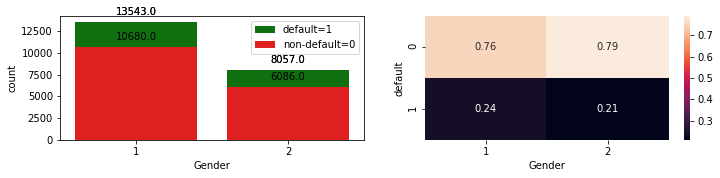

Education


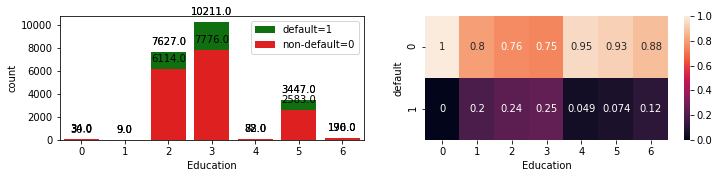

Marital status


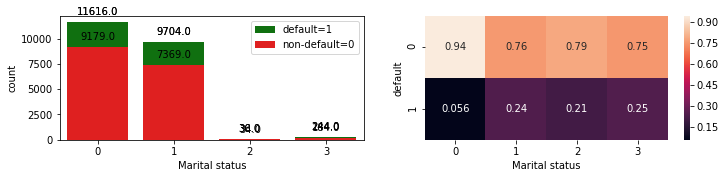

repayment status in September


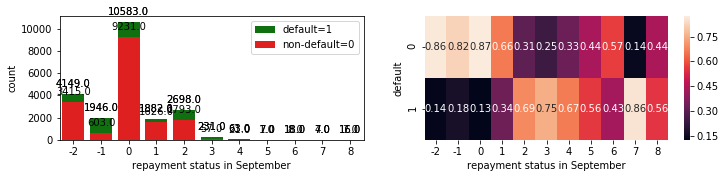

repayment status in August


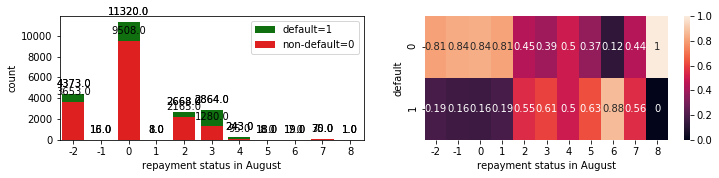

In [73]:
for col in citi.columns[:-1]:
    if citi[col].nunique()<21:
        print(col)
        plt.figure(figsize=[12,5])
        plt.subplot(221)
        splot1=sns.barplot(x=citi[col].unique(), y=citi.groupby(col).count().iloc[:,0],color = "green",label='default=1')
        for p in splot1.patches:
            splot1.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
        
        splot2=sns.barplot(x=citi[col].unique(),y=citi[citi.default==0].groupby(col).count().iloc[:,0],color = "red",label='non-default=0')
        for p in splot1.patches:
            splot2.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
        

        plt.xlabel(col)
        plt.ylabel('count')
        plt.legend()
        
        plt.subplot(222)
        sns.heatmap(pd.crosstab(citi.default,citi[col],normalize='columns'),annot=True)
        plt.show()

,Ref.No,Amount of the given credit (NT dollar),Gender,Education,Marital status,Age,repayment status in September,repayment status in August,default
0,22203,320000,2,1,2,27,1,2,1
1,1288,470000,1,2,1,41,-2,-2,0
2,11822,20000,1,2,2,25,1,2,0
3,15085,80000,1,3,1,41,0,0,1
4,6192,30000,1,1,2,30,1,-2,1
5,12894,320000,2,2,1,39,0,0,0
6,2279,50000,2,3,1,37,2,0,1
7,1282,360000,1,1,2,34,1,-2,0
8,13334,50000,2,1,1,25,0,0,0
9,15251,30000,2,2,1,45,2,0,0


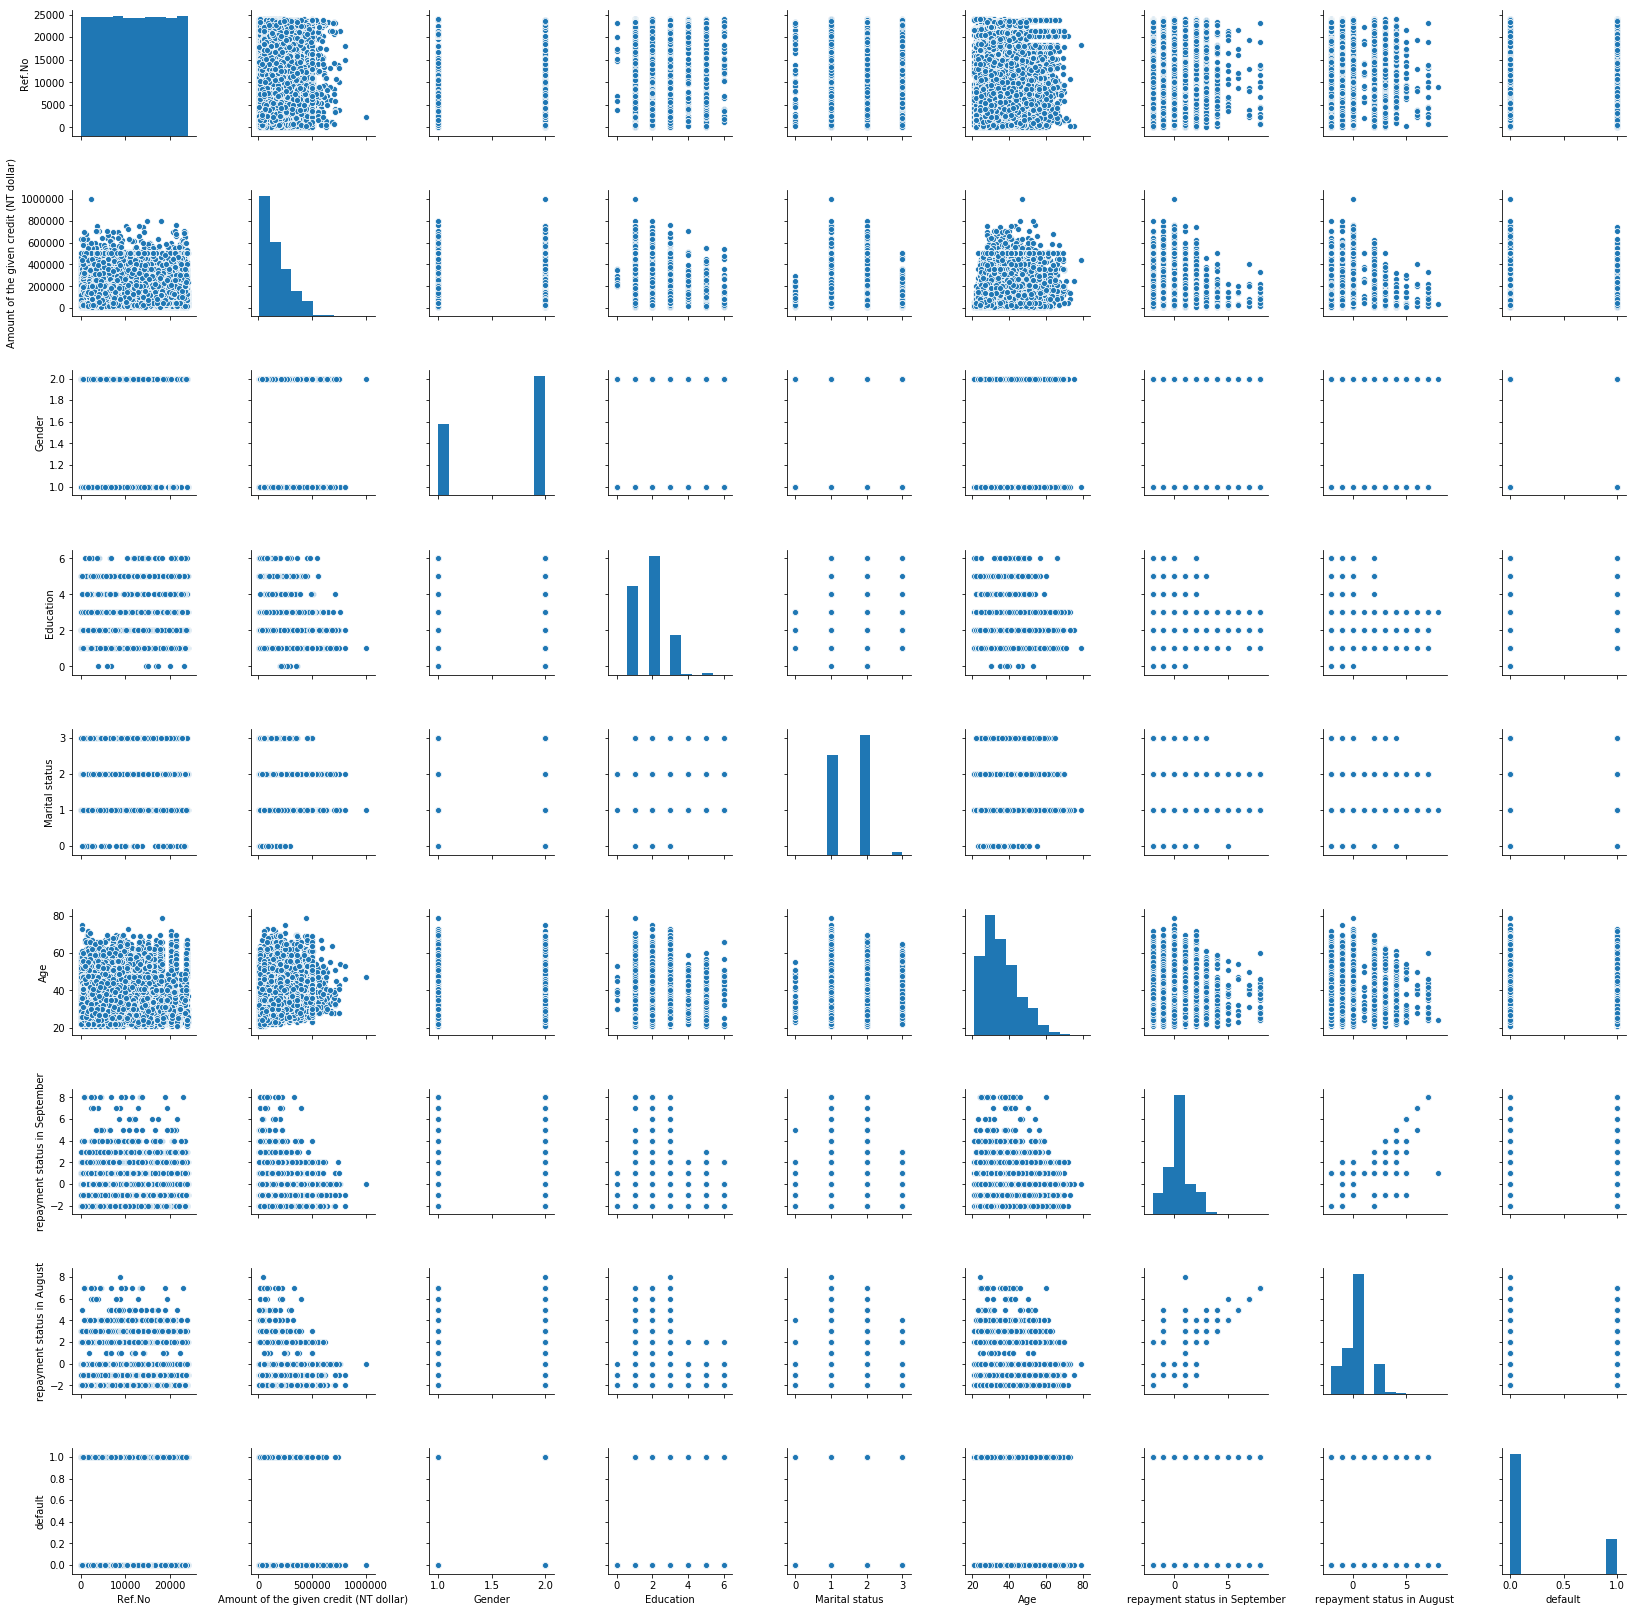

In [393]:
sns.pairplot(citi)

In [196]:
train=pd.read_csv('train_1.csv')
train.columns=['Ref.No','Amount of the given credit (NT dollar)','Gender','Education','Marital status','Age','repayment status in September','repayment status in August','default']
x_train=train.drop('default',axis=1)
y_train=train.default
#train.drop('Ref.No',axis=1,inplace=True)
x_test= pd.read_csv('test.csv')[['Ref.No', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7']]

x_resampled,y_resampled=SMOTE(sampling_strategy=.3).fit_resample(x_train,y_train)
print('SMOTE_x',x_resampled.shape)
print('SMOTE_y',y_resampled.shape)

#scaling
ss= StandardScaler()
scaledx_train= ss.fit_transform(x_resampled)
scaledx_test=ss.transform(x_test)
print('scaled_train',scaledx_train.shape)
print('scaled_test',scaledx_test.shape)

SMOTE_x (21795, 8)
SMOTE_y (21795,)
scaled_train (21795, 8)
scaled_test (2399, 8)


In [197]:
dt=DecisionTreeClassifier(random_state=1)
param_grid={'max_features':[8],'max_depth':[100]}
dt_model= GridSearchCV(dt,param_grid=param_grid)
scores=cross_val_score(dt_model,scaledx_train,y_resampled)
scores.mean()

0.7101177914115424

In [198]:
rf=RandomForestClassifier(random_state=1)
param_grid={'n_estimators':[100]}
dt_model= GridSearchCV(rf,param_grid=param_grid)
scores=cross_val_score(dt_model,scaledx_train,y_resampled)
scores.mean()

0.7958245889373853

In [167]:
adb=AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=1))
param_grid={'n_estimators':[10]}
dt_model= GridSearchCV(adb,param_grid=param_grid)
scores=cross_val_score(dt_model,scaledx_train,y_resampled)
scores.mean()

0.7566230818034487

In [ ]:
gb=GradientBoostingClassifier(base_estimator=RandomForestClassifier())
param_grid={'n_estimators':[10]}
dt_model= GridSearchCV(gb,param_grid=param_grid)
scores=cross_val_score(dt_model,scaledx_train,y_resampled)
scores.mean()

In [168]:
rf=RandomForestClassifier(random_state=1)
param_grid={'n_estimators':[100]}
dt_model= GridSearchCV(rf,param_grid=param_grid)
dt_model=dt_model.fit(scaledx_train,y_resampled)
y_pred=dt_model.predict(scaledx_test)
y_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [179]:
file=pd.DataFrame(y_pred,columns=['Y'])
file=file.rename_axis('Ref.No')
file.to_csv('prediction 2 random forest 1.csv')

In [184]:
lr=LogisticRegressionCV()
lr.fit(scaledx_train,y_resampled)
scores=cross_val_score(lr,scaledx_train,y_resampled)
scores.mean()

0.7170635659047019

In [192]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
scores=cross_val_score(rf,x_train,y_train)
print(scores.mean())
y_pred=rf.predict(x_test)

0.792176019725046


In [195]:
pd.DataFrame(y_pred).to_clipboard()

In [ ]:

train1=pd.read_csv('train_1.csv')
train2=pd.read_csv('train_2.csv')
train=pd.merge(train1,train2,how='outer')

#train=pd.read_csv('train_1.csv')
train.columns=['Ref.No','Amount of the given credit (NT dollar)','Gender','Education',
               'Marital status','Age','repayment status in September','repayment status in August','default',
              'repayment status in july','repayment status in june','repayment status in may','repayment status in april',
              'Amount of bill statement','amount of bill statement in September', 'amount of bill statement in August',
              'amount of bill statement in July']
x_train=train.drop('default',axis=1)
y_train=train.default
#train.drop('Ref.No',axis=1,inplace=True)
x_test= pd.read_csv('test.csv')[['Ref.No', 'X1', 'X2', 'X3', 'X4', 
                                 'X5', 'X6', 'X7','X8','X9','X10','X11','X12','X13','X14','X15']]

#x_resampled,y_resampled=SMOTE(sampling_strategy=.3).fit_resample(x_train,y_train)
#print('SMOTE_x',x_resampled.shape)
#print('SMOTE_y',y_resampled.shape)

#scaling
ss= StandardScaler()
scaledx_train= ss.fit_transform(x_train)
scaledx_test=ss.transform(x_test)
print('scaled_train',scaledx_train.shape)
print('scaled_test',scaledx_test.shape)

rf=RandomForestClassifier(n_estimators=300,random_state=1)
dt_model=rf.fit(scaledx_train,y_train)
scores=cross_val_score(dt_model,scaledx_train,y_train)
print(scores.mean())
y_pred=dt_model.predict(scaledx_test)
print(y_pred)
pd.DataFrame(y_pred)
pd.DataFrame(y_pred).to_clipboard()

In [335]:

train1=pd.read_csv('train_1.csv')
train2=pd.read_csv('train_2.csv')
train=pd.merge(train1,train2,how='outer')

#train=pd.read_csv('train_1.csv')
train.columns=['Ref.No','Amount of the given credit (NT dollar)','Gender','Education',
               'Marital status','Age','repayment status in September','repayment status in August','default',
              'repayment status in july','repayment status in june','repayment status in may','repayment status in april',
              'Amount of bill statement','amount of bill statement in September', 'amount of bill statement in August',
              'amount of bill statement in July']
x_train=train.drop(['Ref.No','default'],axis=1)
y_train=train.default
#train.drop('Ref.No',axis=1,inplace=True)
x_test= pd.read_csv('test.csv')[['X1', 'X2', 'X3', 'X4', 
                                 'X5', 'X6', 'X7','X8','X9','X10','X11','X12','X13','X14','X15']]

#x_resampled,y_resampled=SMOTE(sampling_strategy=.3).fit_resample(x_train,y_train)
#print('SMOTE_x',x_resampled.shape)
#print('SMOTE_y',y_resampled.shape)

#scaling
ss= StandardScaler()
scaledx_train= ss.fit_transform(x_train)
scaledx_test=ss.transform(x_test)
print('scaled_train',scaledx_train.shape)
print('scaled_test',scaledx_test.shape)

rf=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),n_estimators=35,random_state=1,learning_rate=.1)
dt_model=rf.fit(scaledx_train,y_train)
scores=cross_val_score(dt_model,scaledx_train,y_train)
print(scores.mean())
y_pred=dt_model.predict(scaledx_test)
print(y_pred)
pd.DataFrame(y_pred)
pd.DataFrame(y_pred).to_clipboard()

scaled_train (21600, 15)
scaled_test (2399, 15)
0.818101933103461
[0 0 0 ... 1 1 0]


In [229]:
for col in train.columns:
    if train[col].nunique()<30:
        train[col]= train[col].as

Gender
Education
Marital status
repayment status in September
repayment status in August
default
repayment status in july
repayment status in june
repayment status in may
repayment status in april


In [267]:
rf=RandomForestClassifier()
rf.fit(scaledx_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [268]:
rf.feature_importances_

array([0.09280076, 0.01830393, 0.03303489, 0.02376821, 0.10824986,
       0.11847327, 0.04926055, 0.0354336 , 0.01864778, 0.02266835,
       0.03503587, 0.11582214, 0.11147289, 0.10876033, 0.10826757])

In [270]:
x_train.head()

,Amount of the given credit (NT dollar),Gender,Education,Marital status,Age,repayment status in September,repayment status in August,repayment status in july,repayment status in june,repayment status in may,repayment status in april,Amount of bill statement,amount of bill statement in September,amount of bill statement in August,amount of bill statement in July
0,320000,2,1,2,27,1,2,2,2,2,2,43243,42537,41370,40694
1,470000,1,2,1,41,-2,-2,-2,-2,-2,-1,13780,12242,32463,20621
2,20000,1,2,2,25,1,2,0,0,0,0,20415,18266,18921,19297
3,80000,1,3,1,41,0,0,0,0,0,-1,76015,77582,60311,62471
4,30000,1,1,2,30,1,-2,-2,-2,-2,-2,0,0,0,0


In [313]:

train1=pd.read_csv('train_1.csv')
train2=pd.read_csv('train_2.csv')
train=pd.merge(train1,train2,how='outer')

#train=pd.read_csv('train_1.csv')
train.columns=['Ref.No','Amount of the given credit (NT dollar)','Gender','Education',
               'Marital status','Age','repayment status in September','repayment status in August','default',
              'repayment status in july','repayment status in june','repayment status in may','repayment status in april',
              'Amount of bill statement','amount of bill statement in September', 'amount of bill statement in August',
              'amount of bill statement in July']
x_train=train.drop(['Ref.No','default'],axis=1)
y_train=train.default
#train.drop('Ref.No',axis=1,inplace=True)
x_test= pd.read_csv('test.csv')[['X1', 'X2', 'X3', 'X4', 
                                 'X5', 'X6', 'X7','X8','X9','X10','X11','X12','X13','X14','X15']]

#x_train,y_train=SMOTE(sampling_strategy=.3).fit_resample(x_train,y_train)
#print('SMOTE_x',x_resampled.shape)
#print('SMOTE_y',y_resampled.shape)




#scaling
ss= StandardScaler()
scaledx_train= ss.fit_transform(x_train)
scaledx_test=ss.transform(x_test)
print('scaled_train',scaledx_train.shape)
print('scaled_test',scaledx_test.shape)


sv=SVC()
rf=BaggingClassifier(base_estimator=sv,n_estimators=5)
dt_model=rf.fit(scaledx_train,y_train)
scores=cross_val_score(dt_model,scaledx_train,y_train)
print(scores.mean())
y_pred=dt_model.predict(scaledx_test)
print(y_pred)
pd.DataFrame(y_pred)
pd.DataFrame(y_pred).to_clipboard()

scaled_train (21600, 15)
scaled_test (2399, 15)
0.8172222648828669
[0 0 0 ... 1 1 0]


In [343]:

train1=pd.read_csv('train_1.csv')
train2=pd.read_csv('train_2.csv')
train=pd.merge(train1,train2,how='outer')

#train=pd.read_csv('train_1.csv')
train.columns=['Ref.No','Amount of the given credit (NT dollar)','Gender','Education',
               'Marital status','Age','repayment status in September','repayment status in August','default',
              'repayment status in july','repayment status in june','repayment status in may','repayment status in april',
              'Amount of bill statement','amount of bill statement in September', 'amount of bill statement in August',
              'amount of bill statement in July']
x_train=train.drop(['Ref.No','default'],axis=1)
y_train=train.default
#train.drop('Ref.No',axis=1,inplace=True)
x_test= pd.read_csv('test.csv')[['X1', 'X2', 'X3', 'X4', 
                                 'X5', 'X6', 'X7','X8','X9','X10','X11','X12','X13','X14','X15']]

#x_train,y_train=SMOTE(sampling_strategy=.3).fit_resample(x_train,y_train)
#print('SMOTE_x',x_resampled.shape)
#print('SMOTE_y',y_resampled.shape)




#scaling
ss= StandardScaler()
scaledx_train= ss.fit_transform(x_train)
scaledx_test=ss.transform(x_test)
print('scaled_train',scaledx_train.shape)
print('scaled_test',scaledx_test.shape)


sv=SVC()
gb=GradientBoostingClassifier(learning_rate=.04,n_estimators=100)
rf=BaggingClassifier(base_estimator=gb)
#rf=ExtraTreeClassifier()
dt_model=rf.fit(scaledx_train,y_train)
scores=cross_val_score(dt_model,scaledx_train,y_train)
print(scores.mean())
y_pred=dt_model.predict(scaledx_test)
print(y_pred)
pd.DataFrame(y_pred)
pd.DataFrame(y_pred).to_clipboard()

scaled_train (21600, 15)
scaled_test (2399, 15)
0.8185185547625178
[0 0 0 ... 1 1 0]


In [344]:

train1=pd.read_csv('train_1.csv')
train2=pd.read_csv('train_2.csv')
train=pd.merge(train1,train2,how='outer')

#train=pd.read_csv('train_1.csv')
train.columns=['Ref.No','Amount of the given credit (NT dollar)','Gender','Education',
               'Marital status','Age','repayment status in September','repayment status in August','default',
              'repayment status in july','repayment status in june','repayment status in may','repayment status in april',
              'Amount of bill statement','amount of bill statement in September', 'amount of bill statement in August',
              'amount of bill statement in July']
x_train=train.drop(['Ref.No','default'],axis=1)
y_train=train.default
#train.drop('Ref.No',axis=1,inplace=True)
x_test= pd.read_csv('test.csv')[['X1', 'X2', 'X3', 'X4', 
                                 'X5', 'X6', 'X7','X8','X9','X10','X11','X12','X13','X14','X15']]

#x_train,y_train=SMOTE(sampling_strategy=.3).fit_resample(x_train,y_train)
#print('SMOTE_x',x_resampled.shape)
#print('SMOTE_y',y_resampled.shape)




#scaling
ss= StandardScaler()
scaledx_train= ss.fit_transform(x_train)
scaledx_test=ss.transform(x_test)
print('scaled_train',scaledx_train.shape)
print('scaled_test',scaledx_test.shape)


sv=SVC()
gb=AdaBoostClassifier(base_estimator=RandomForestClassifier(),learning_rate=.04,n_estimators=100)
rf=BaggingClassifier(base_estimator=gb)
#rf=ExtraTreeClassifier()
dt_model=rf.fit(scaledx_train,y_train)
scores=cross_val_score(dt_model,scaledx_train,y_train)
print(scores.mean())
y_pred=dt_model.predict(scaledx_test)
print(y_pred)
pd.DataFrame(y_pred)
pd.DataFrame(y_pred).to_clipboard()

scaled_train (21600, 15)
scaled_test (2399, 15)


KeyboardInterrupt: 

In [349]:
np.cov(scaledx_train[:,0],scaledx_train[:,14])

array([[1.0000463, 0.2967601],
       [0.2967601, 1.0000463]])

In [358]:
x=pd.read_csv('wine.csv').drop(['class_label', 'class_name'],axis=1)
y=pd.read_csv('wine.csv')['class_label']

In [360]:
ss=StandardScaler()
scaledx=ss.fit_transform(x)

In [364]:
pc=PCA()
x_pc=pc.fit_transform(scaledx)

In [371]:
x_pc

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [380]:
print('explained_variance',pc.explained_variance_)
print('explained_variance_ratio_',pc.explained_variance_ratio_)
print('number of componenets',(np.cumsum(pc.explained_variance_ratio_)<.8).sum())
pc.explained_variance_ratio_[np.cumsum(pc.explained_variance_ratio_)<.8]

explained_variance [4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199]
explained_variance_ratio_ [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]
number of componenets 4


array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 ])

In [391]:
plt.figure(figsize=[15,5])
plt.subplot(121)
plt.plot(pc.explained_variance_, label='explained variance')
plt.subplot(122)
plt.plot(np.cumsum(pc.explained_variance_ratio_),label='cumulative explained variance','-o')
plt.grid()
plt.legend()
plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-391-2d339f7d0932>, line 5)